In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 1. Load the Data
try:
data = pd.read_csv("C:\\Users\\Harshit\\Downloads\\Code Craft Data Science Internship\\bank marketing pr\\bank additional\\bank-additional-full.csv", sep=';') # Or whatever the correct filename is
except FileNotFoundError:
    print("Error: 'bank-additional-full.csv' not found.  Make sure the file is in the correct directory.")
    exit()

In [13]:
# Check for missing values
print(data.isnull().sum())
# For simplicity, let's drop rows with any missing values.  A better approach might involve imputation.
data = data.dropna()

# Convert categorical features to numerical using Label Encoding
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
for feature in categorical_features:
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature])

# Encode the target variable 'y'
le = LabelEncoder()
data['y'] = le.fit_transform(data['y'])  # 0 for 'no', 1 for 'yes'

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


Accuracy: 0.88
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       732
           1       0.44      0.42      0.43        92

    accuracy                           0.88       824
   macro avg       0.68      0.68      0.68       824
weighted avg       0.87      0.88      0.87       824

[[682  50]
 [ 53  39]]


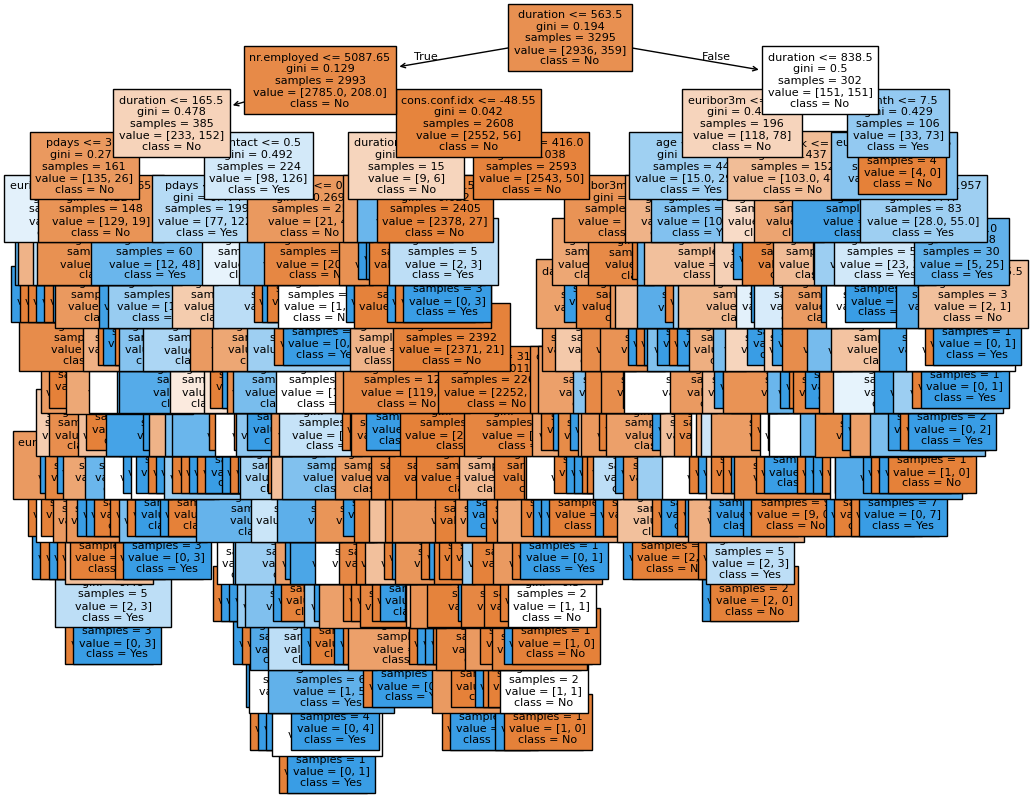

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# 1. Load the Data
try:
    data = pd.read_csv("C:\\Users\\Harshit\\Downloads\\Code Craft Data Science Internship\\bank marketing pr\\bank additional\\bank-additional.csv", sep=';')  # Use bank-additional.csv
except FileNotFoundError:
    print("Error: 'bank-additional.csv' not found.  Make sure the file is in the correct directory.")
    exit()

# 2. Data Preprocessing

# Handle "unknown" values (missing data representation)
# Replace "unknown" with NaN (Not a Number) to handle it properly
data = data.replace('unknown', pd.NA)

# Impute missing values with the mode for categorical columns
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = data[col].fillna(data[col].mode()[0])

# Convert categorical features to numerical using Label Encoding
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
for feature in categorical_features:
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature])

# Encode the target variable 'y'
le = LabelEncoder()
data['y'] = le.fit_transform(data['y'])  # 0 for 'no', 1 for 'yes'

# 3. Split Data into Training and Testing Sets
X = data.drop('y', axis=1)
y = data['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Create and Train the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# 5. Make Predictions
y_pred = dt_classifier.predict(X_test)

# 6. Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# 7. Visualize the Decision Tree
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
plot_tree(dt_classifier, feature_names=X.columns, class_names=['No', 'Yes'], filled=True, fontsize=8)
plt.show()
